In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [7]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [8]:
y.shape, tx.shape

((10000,), (10000, 2))

## answers of the questions

1) In the tx we have two columns: the first one tx[0] represents only 0-1, it describes if the persons we are talking about is a male (0) or a famale(1); the second column in equal to the height of the persson itesel.
<br>
<br>
2) each row represents one person
<br>
<br>
3) y = 3 x 1 and X = 3 x 2 ;  X[32] would represent the height of the person we are considering


# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [9]:
w = np.array((1,2))

In [10]:
w

array([1, 2])

In [11]:
def compute_loss(y, tx, w):
    e = y - np.dot(tx,w)
    return 1/(2*len(y))*np.dot(e.transpose(),e)

In [12]:
compute_loss(y, tx, w)

2694.483365887084

# 2 Grid Search

Fill in the function `grid_search()` below:

In [13]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

In [14]:
w0, w1 = generate_w(num_intervals=10)

In [15]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            w = np.array([int(grid_w0[i]), int(grid_w1[j])] )
            losses[i,j] = compute_loss(y,tx,w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=45.16246166040093, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.016 seconds


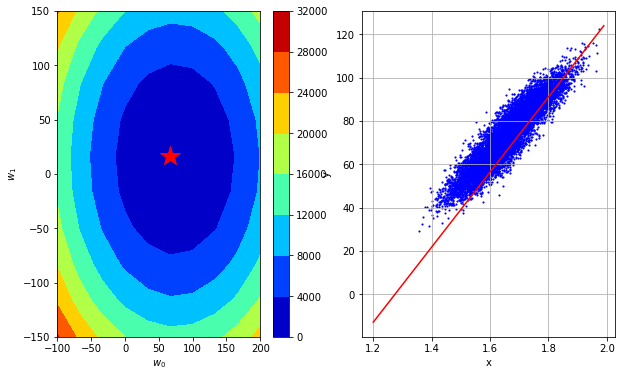

In [16]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [17]:
def compute_gradient(y, tx, w):
    e = y - np.dot(tx,w)
    return -1/(2*len(y))*np.dot(tx.transpose(),e)

In [18]:
compute_gradient(y, tx, w)

array([-36.146961  ,  -5.73985622])

Please fill in the functions `gradient_descent` below:

In [19]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        G = compute_gradient(y, tx,w)
        loss = compute_loss(y, tx,w)
        w = w-gamma*G
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [21]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.1

# Initialization
w_initial = np.array([10, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=488629.5850577492, w0=13.164696100105337, w1=950.6739856217497
Gradient Descent(1/499): loss=440989.7006386862, w0=16.17115739520536, w1=903.8142719624117
Gradient Descent(2/499): loss=397994.7049504814, w0=19.027295625550384, w1=859.2975439860406
Gradient Descent(3/499): loss=359191.72134187684, w0=21.74062694437816, w1=817.006652408488
Gradient Descent(4/499): loss=324172.02863511094, w0=24.318291697264563, w1=776.830305409813
Gradient Descent(5/499): loss=292566.75596725487, w0=26.767073212506595, w1=738.6627757610718
Gradient Descent(6/499): loss=264042.99738451466, w0=29.09341565198658, w1=702.4036225947676
Gradient Descent(7/499): loss=238300.30526359167, w0=31.30344096949254, w1=667.9574270867787
Gradient Descent(8/499): loss=215067.5256244587, w0=33.40296502112322, w1=635.2335413541891
Gradient Descent(9/499): loss=194099.94200014116, w0=35.39751287017235, w1=604.1458499082291
Gradient Descent(10/499): loss=175176.6977791946, w0=37.292333326769054,

In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [24]:
for minibatch_y, minibatch_tx in batch_iter(y, tx, 1, num_batches=1):
    print(minibatch_y)
    print(minibatch_tx)

[ 78.13076614]
[[ 1.          0.62158156]]


In [20]:
y_i

array([ 65.72111676,  52.87320631,  97.01251031,  49.79551808,
        67.71679997,  63.01253103,  89.74822699,  75.29092651,
        63.78944552,  82.26781438,  36.56119176,  96.1644715 ,
        74.05297171,  79.37244862,  98.78093967,  84.57290198,
        52.71229475,  83.77209679,  84.60513186,  50.4958277 ,
        52.77631595,  67.17583169,  62.01441497,  62.32954641,
        74.38014451,  82.19497727,  71.10754557,  51.05600823,
        84.9154085 ,  87.58126101,  73.79797805,  91.65245608])

In [65]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y - np.dot(tx,w)
    return -1/(2*len(y))*np.dot(tx.transpose(),e)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            y_i = minibatch_y
            tx_i = minibatch_tx
        G = compute_stoch_gradient(y_i, tx_i,w)
        loss = compute_loss(y_i, tx_i,w)
        w = w-gamma*G
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [66]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 32

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=3106.2741072080635, w0=27.153245019753015, w1=8.876007094445926
Gradient Descent(1/49): loss=1053.2380795046831, w0=43.05238929291747, w1=10.81664921823191
Gradient Descent(2/49): loss=542.719463771768, w0=54.426180011309974, w1=11.30460981184944
Gradient Descent(3/49): loss=200.25516963516458, w0=61.258978954880675, w1=12.386434389317415
Gradient Descent(4/49): loss=75.45353213523859, w0=65.08759464102516, w1=12.302652532710518
Gradient Descent(5/49): loss=45.65100329393326, w0=67.76038503650666, w1=13.0665146961316
Gradient Descent(6/49): loss=23.56068847307686, w0=69.25591785515645, w1=13.65758804769932
Gradient Descent(7/49): loss=20.657203900003907, w0=70.22499423200294, w1=13.438221641070623
Gradient Descent(8/49): loss=16.959763586492357, w0=71.17843039452983, w1=12.746807940609017
Gradient Descent(9/49): loss=21.378081469824878, w0=72.30588021223998, w1=13.547407464254885
Gradient Descent(10/49): loss=16.10153987092066, w0=72.9386084621638, w1=13.58

In [27]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [67]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y - np.dot(tx,w)
    return -1/(2*len(y))*np.dot(tx.transpose(),e)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma, num_batches):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        y_i = []
        tx_i = []
        G=[]
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches):
            y_i.append(minibatch_y)
            tx_i.append(minibatch_tx)
        for i in range(num_batches):
            G_i = compute_stoch_gradient(y_i[i], tx_i[i],w)
            G.append(G_i)
        g = (1/num_batches)*sum(G)
        loss = compute_loss(1/num_batches*sum(y_i), 1/num_batches*sum(tx_i),w)
        w = w-gamma*g
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [68]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 32
num_batches = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma,num_batches)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2651.5263677920602, w0=25.43885167490859, w1=3.6745310450225825
Gradient Descent(1/49): loss=1138.825232560279, w0=42.08485747593471, w1=7.1181955312980865
Gradient Descent(2/49): loss=485.8888090011785, w0=52.973124552808045, w1=9.01220637991204
Gradient Descent(3/49): loss=214.72357194559663, w0=60.18732848671801, w1=11.17975814159516
Gradient Descent(4/49): loss=91.00125964154348, w0=64.86874974503752, w1=11.951169230279305
Gradient Descent(5/49): loss=38.55067369312939, w0=67.84515810348003, w1=12.622794837162779
Gradient Descent(6/49): loss=12.534042474014344, w0=69.45209039704136, w1=12.94676092551983
Gradient Descent(7/49): loss=8.608135628134516, w0=70.74257907096232, w1=12.944675482639001
Gradient Descent(8/49): loss=3.495073638297178, w0=71.5432073930531, w1=13.143438176977678
Gradient Descent(9/49): loss=2.3139878113563754, w0=72.15640445843492, w1=13.267465970719751
Gradient Descent(10/49): loss=1.7333480809377848, w0=72.5334913928453, w1=13.365

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [32]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

Grid Search: loss*=46.774801130735526, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.007 seconds


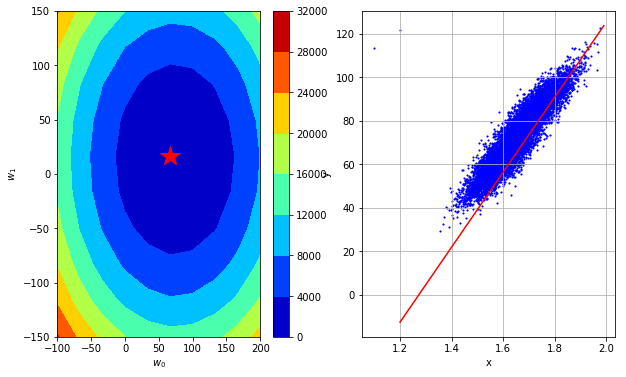

In [33]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)